___________________________________________________________
# Module 9 Lab 1
# Rachel Finley

#### **Problem:**
You are given a dataset named boston (OA 5.7 Download OA 5.7). This dataset contains information collected by the US Census Service concerning housing in the area of Boston, Mass. The dataset is small in size, with only 506 cases. The data was originally published by Harrison, D., &  Rubinfeld, D.L. (1978). Hedonic prices and the demand for clean air. Journal of  Environmental Economics and Management, 5, 81–102. 

Using appropriate correlation and regression tests, find which of the variables is the best predictor of NOX (nitric oxides concentration). For that model, provide the regression plot and equation.  

Using appropriate correlation and regression tests, find which of the variables is the best predictor of MEDV (median home value). For that model, provide the regression plot and equation. 
___________________________________________________________

___________________________________________________________
## Importing Libraries and setting up a data and correlation DF
___________________________________________________________

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

_______________________________________________________________________________________

In [2]:
df = pd.read_csv("Boston_Census_Data.csv")

df.head()

,CRIM,ZN,NDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- CRIM – per capita crime rate by town  
- ZN – proportion of residential land zoned for lots over 25,000 sq.ft.  
- NDUS – proportion of non-retail business acres per town.  
- CHAS – Charles River dummy variable (1 if tract bounds river; 0  otherwise) 
- NOX – nitric oxides concentration (parts per 10 million)  
- RM – average number of rooms per dwelling  
- AGE – proportion of owner-occupied units built prior to 1940  
- DIS – weighted distances to five Boston employment centres  
- RAD – index of accessibility to radial highways  
- TAX – full-value property-tax rate per 10,000 dollars  
- PTRATIO – pupil-teacher ratio by town  
- B – 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town  
- LSTAT –% lower status of the population  
- MEDV – median value of owner-occupied homes in $1000’s  

In [3]:
corr_df = df.corr()

___________________________________________________________
# Relationship Between NOX, and its Highest and Lowest Correlation Columns
___________________________________________________________

In [4]:
nox_highest_corr = dict(corr_df["NOX"].nlargest(2)) # since 0 index is with itself
nox_smallest_corr = dict(corr_df["NOX"].nsmallest(1))
print(f"NOX Column Highest/Lowest Correlations: \n{list(nox_highest_corr.items())[1]} , {nox_smallest_corr}")

NOX Column Highest/Lowest Correlations: 
('NDUS', 0.7636514469209139) , {'DIS': -0.7692301132258282}


In [5]:
X1 = df[["DIS", "NDUS"]]
X1 = sm.add_constant(X1)
y1 = df["NOX"]
nox_lr_model = sm.OLS(y1, X1).fit()
print(nox_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     554.3
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          6.52e-128
Time:                        02:45:53   Log-Likelihood:                 667.66
No. Observations:                 506   AIC:                            -1329.
Df Residuals:                     503   BIC:                            -1317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5678      0.013     42.821      0.0

In [6]:
nox_int = round(nox_lr_model.params[0], 4)
DIS_coef = round(nox_lr_model.params[1], 4)
NDUS_coef = round(nox_lr_model.params[2], 4)
nox_lr_eq = f"NOX = ({nox_int}) + ({DIS_coef}) * DIS + ({NDUS_coef}) * NDUS"
print(nox_lr_eq)

NOX = (0.5678) + (-0.0252) * DIS + (0.0074) * NDUS


In [7]:
xx1, yy1 = np.meshgrid(np.linspace(X1["DIS"].min(), X1["DIS"].max(), 100),
                       np.linspace(X1["NDUS"].min(), X1["NDUS"].max(), 100))
zz1 = nox_lr_model.params[0] + nox_lr_model.params[1] * xx1 + nox_lr_model.params[2] * yy1

Text(0.5, 0, 'NOX')

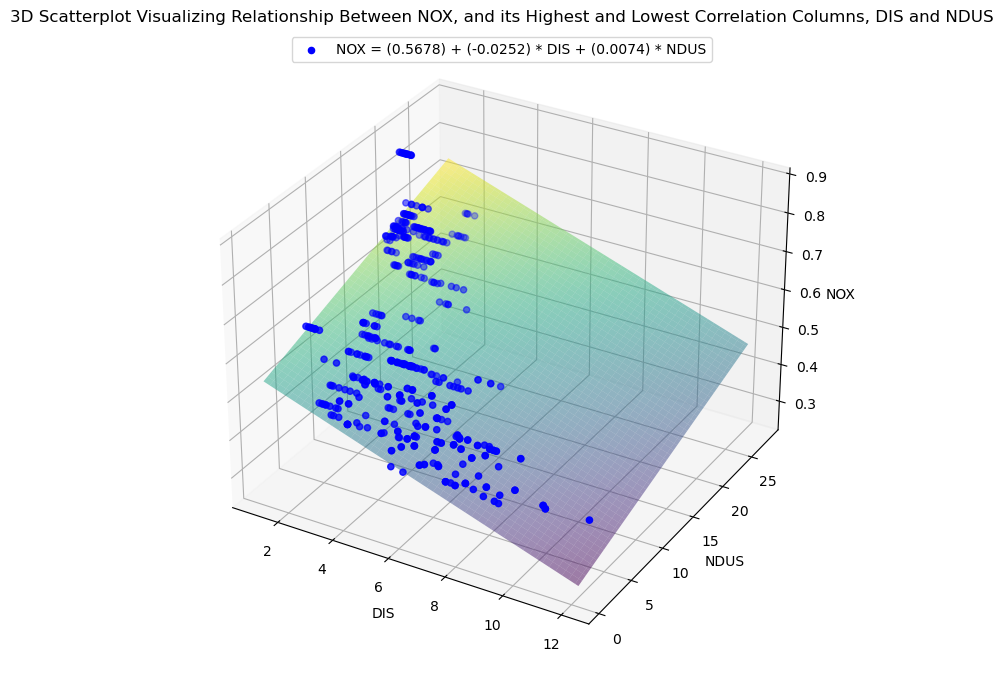

In [8]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X1["DIS"], X1["NDUS"], y1, color='blue')
ax1.plot_surface(xx1, yy1, zz1, alpha=0.5, cmap='viridis')

plt.title("3D Scatterplot Visualizing Relationship Between NOX, and its Highest and Lowest Correlation Columns, DIS and NDUS")

ax1.legend([nox_lr_eq], loc='upper center')

ax1.set_xlabel('DIS')
ax1.set_ylabel('NDUS')
ax1.set_zlabel('NOX')


- DIS – weighted distances to five Boston employment centres  
- NDUS – proportion of non-retail business acres per town.  
- NOX – nitric oxides concentration (parts per 10 million)  

___________________________________________________________
# Relationship Between MEDV, and its Highest and Lowest Correlation Columns
___________________________________________________________

In [9]:
medv_highest_corr = dict(corr_df["MEDV"].nlargest(2)) # since 0 index is with itself
medv_smallest_corr = dict(corr_df["MEDV"].nsmallest(1))
print(f"MEDV Column Highest/Lowest Correlations: \n{list(medv_highest_corr.items())[1]} , {medv_smallest_corr}")

MEDV Column Highest/Lowest Correlations: 
('RM', 0.6953599470715401) , {'LSTAT': -0.7376627261740145}


In [10]:
X2 = df[["LSTAT", "RM"]]
X2 = sm.add_constant(X2)
y2 = df["MEDV"]
medv_lr_model = sm.OLS(y2, X2).fit()
print(medv_lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          7.01e-112
Time:                        02:45:54   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

In [11]:
medv_int = round(medv_lr_model.params[0], 4)
LSTAT_coef = round(medv_lr_model.params[1], 4)
RM_coef = round(medv_lr_model.params[2], 4)
medv_lr_eq = f"MEDV = ({nox_int}) + ({DIS_coef}) * LSTAT + ({NDUS_coef}) * RM"
print(medv_lr_eq)

MEDV = (0.5678) + (-0.0252) * LSTAT + (0.0074) * RM


In [12]:
xx2, yy2 = np.meshgrid(np.linspace(X2["LSTAT"].min(), X2["LSTAT"].max(), 100),
                       np.linspace(X2["RM"].min(), X2["RM"].max(), 100))
zz2 =  medv_lr_model.params[0] + medv_lr_model.params[1] * xx2 + medv_lr_model.params[2] * yy2 

Text(0.5, 0, 'MEDV')

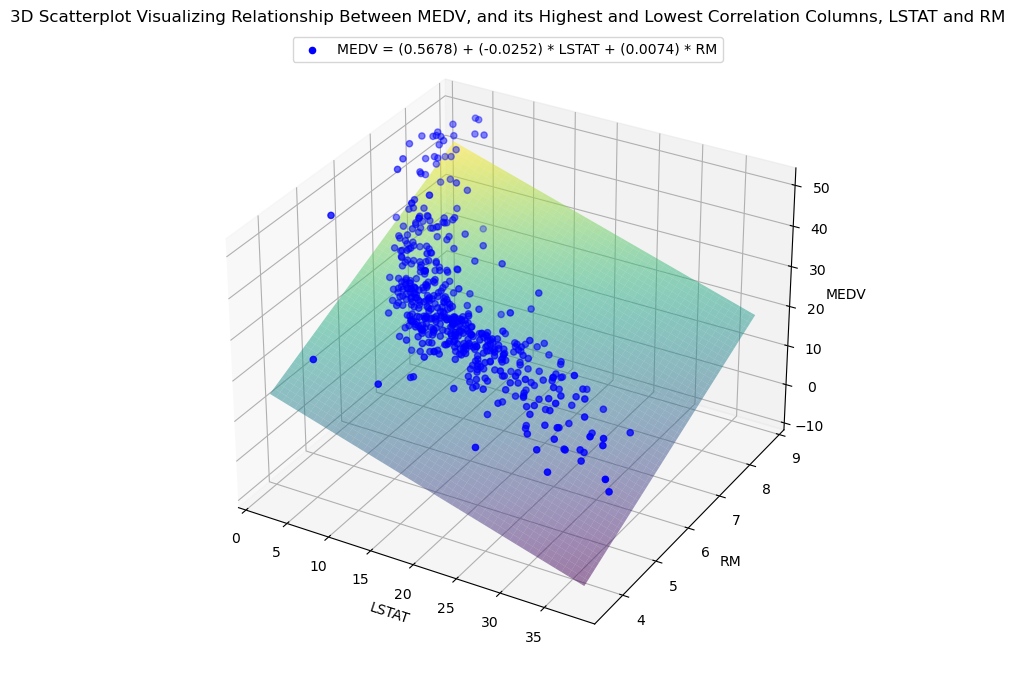

In [13]:
fig = plt.figure(figsize=(18, 10))
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X2["LSTAT"], X2["RM"], y2, color='blue')
ax2.plot_surface(xx2, yy2, zz2, alpha=0.5, cmap='viridis')

plt.title("3D Scatterplot Visualizing Relationship Between MEDV, and its Highest and Lowest Correlation Columns, LSTAT and RM")

ax2.legend([medv_lr_eq], loc = 'upper center')
ax2.set_xlabel('LSTAT')
ax2.set_ylabel('RM')
ax2.set_zlabel('MEDV')


- LSTAT –% lower status of the population  
- RM – average number of rooms per dwelling  
- MEDV – median value of owner-occupied homes in $1000’s  
______________________________________________________________________